# Calculate elevation range

This notebook calculates the minimum and maximum elevation within a study area defined by a vecotor polygon boundary from a raster digital elevation model.

#### import statements

In [80]:
from geo.models import Raster
from geo.models import Boundary

import rasterio
from shapely.geometry import shape
import numpy
import numpy.ma
import rasterio.mask

from matplotlib import cm as colormaps
from matplotlib import pyplot
%matplotlib inline

#### load raster information from database

In [3]:
dem_record = Raster.objects.get(name='dem')

#### load study area boundary

In [45]:
boundary_record = Boundary.objects.get(name='study area')
boundary = [eval(boundary_record.geometry.geojson)]

#### mask raster with boundary

In [104]:
with rasterio.open(path=dem_record.filepath, mode='r') as source:
    dem, transform = rasterio.mask.mask(source, boundary, crop=True, nodata=-9999)
dem = numpy.ma.masked_equal(dem.data, -9999)

#### calculate the minimum and maximum value

In [106]:
dem.min()

560

In [107]:
dem.max()

1009

#### plot the masked raster

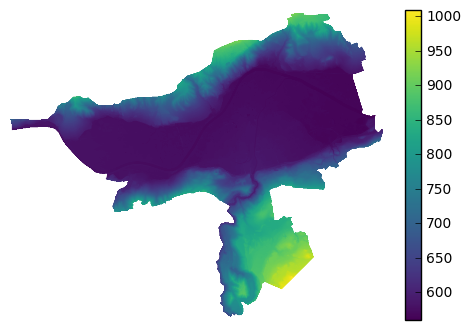

In [117]:
pyplot.imshow(dem[0], cmap='viridis', vmin=dem.min(), vmax=dem.max())
pyplot.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False,
                   top=False, right=False)
pyplot.axes().set_frame_on(False)
cb = pyplot.colorbar()